# Assessment Rule Derivation
This notebook presents the procedure of assessment rule derivation for the maximum deflection of carbon concrete elements consistent with EC2

Based on section 7.4.2 of the EC2 (Nachweis der Begrenzung der Verformungen ohne direkte Berechnung; Cases where calculations may be omitted)

##### eq (7.16.a): 

$$\dfrac{l}{d} = K.\left[11+1.5\sqrt{f_{ck}}\dfrac{\rho_0}{\rho} + 3.2\sqrt{f_{ck}}.\sqrt{\left(\dfrac{\rho_0}{\rho} - 1\right)^3}\right] \mathrm{if} \rho \leq \rho_0$$

$$ \dfrac{l}{d} = K.\left[11+1.5\sqrt{f_{ck}}\dfrac{\rho_0}{\rho- \rho^\prime} + \dfrac{1}{12}\sqrt[2]{f_{ck}}.\sqrt{(\dfrac{\rho^\prime}{\rho_0})}\right] \mathrm{if} \rho > \rho_0 $$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $\dfrac{l}{d}$ | - | the limit value of the bending slenderness (ratio of span to effective height) |
| K | - | the coefficient for consideration of the different static systems according to Table 7.4N |
| $\rho_0$ | - | the reference reinforcement ratio, $\rho_0 = 10^{-3}.\sqrt{f_{ck}}$ |
| $\rho$ | - | the required ratio of tensile reinforcement in the center of the span to resist the design moment (at the restraint section for cantilever beams) |
| $\rho^\prime$ | - | the required ratio of compression reinforcement in the center of the span to resist the design moment (at the restraint section for cantilever beams) |
| $f_{ck}$ | Mpa | the Characteristic cylinder compressive strength of the concrete after 28 days |

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sympy import symbols
from sympy.plotting import plot
import sympy as sp
import numpy as np
import bmcs_utils.api as bu

In [2]:
K, rho_0, rho, rho_p, f_ck = symbols(r'K, \rho_0, \rho,\rho^\prime, f_{ck}', real=True, nonnegative=True)

In [3]:
ldr = sp.Piecewise(
     (K*(11 + 1.5*((f_ck)**0.5)*(rho_0/rho) + 3.2*((f_ck)**0.5)*((rho_0/rho - 1)**(3/2))) , rho <= rho_0 ),
     (K*(11 + 1.5*((f_ck)**0.5)*(rho_0/(rho - rho_p)) +  (1/12)*(f_ck**0.5)*((rho_p/rho_0)**0.5)) , rho > rho_0)
)
ldr

Piecewise((K*(3.2*f_{ck}**0.5*(-1 + \rho_0/\rho)**1.5 + 11 + 1.5*\rho_0*f_{ck}**0.5/\rho), \rho <= \rho_0), (K*(0.0833333333333333*\rho^\prime**0.5*\rho_0**(-0.5)*f_{ck}**0.5 + 1.5*\rho_0*f_{ck}**0.5/(\rho - \rho^\prime) + 11), True))

In [4]:
ldr = ldr.subs(rho_0, 0.001 * sp.sqrt(f_ck))
get_slenderness = sp.lambdify((rho, rho_p, K , f_ck), ldr, 'numpy')

In [5]:
import matplotlib.pyplot as plt
%matplotlib widget

rho_range = np.arange(0.0025, 0.025, 0.0001)
f_ck_range = (20, 30, 35, 40, 50, 70)

slenderness = []
for f_ck in f_ck_range:
    for rho in rho_range:
        slenderness.append(get_slenderness(rho, 0,  1, f_ck))
    plt.plot(rho_range*100, slenderness)
    slenderness = []

plt.ylim(10, 35)
plt.xlim(0.25, 2.5)
plt.ylabel('l/d')
plt.xlabel(r'$\rho$ %')
plt.title('7.16a & 7.16b curve')
plt.show()

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015

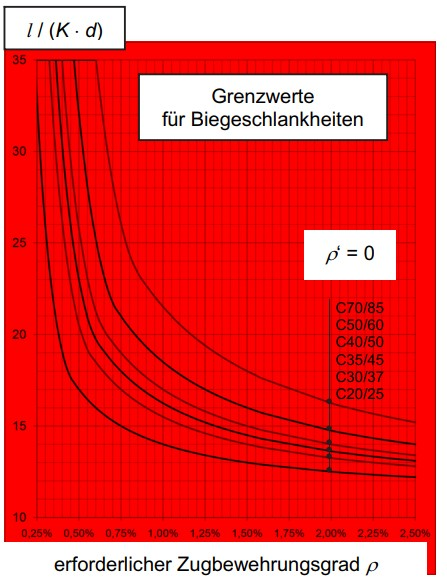

### Load-Deflection profle analysis

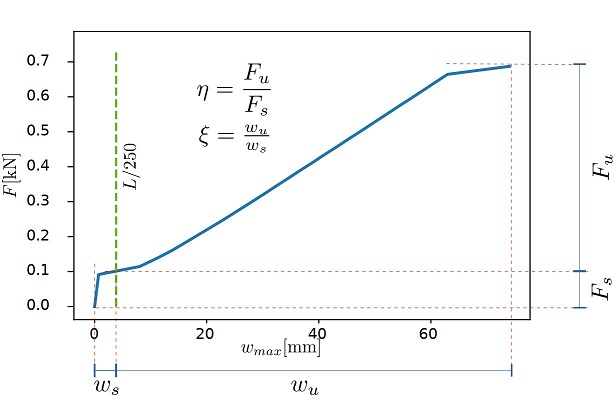

| Symbol | Unit | Description
| :-: | :-: | :- |
| $F_{s}$ | - | the SLS strength |
| $F_{u}$ | - | the strength between SLS limit and ULS |
| $w_{s}$ | - | the SLS deflection |
| $w_{u}$ | - | the deflection between SLS limit and ULS |  

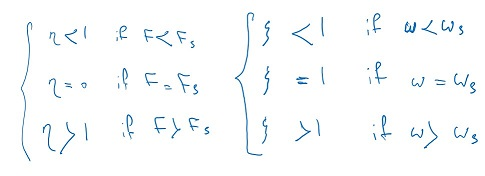

In [6]:
from bmcs_cross_section.mkappa.mkappa import MKappa, ReinforcementType
from bmcs_cross_section.cs_design.cs_layout import Reinforcement
from bmcs_beam.beam_config.boundary_conditions import BoundaryConditions, BoundaryConfig
from bmcs_beam.bending.deflection_profile import DeflectionProfile
from bmcs_beam.beam_config.beam_design import BeamDesign
from bmcs_cross_section.cs_design.cs_shape import TShape
from os.path import join
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import bmcs_utils.api as bu
from mpl_toolkits import mplot3d

def map_params(mc, B, H, eps_tu, E_cc, E_ct, eps_cr, eps_cy, mu, eps_cu):
    mc.cross_section_shape.B=B
    mc.cross_section_shape.H=H
    mc.E_cc=E_cc
    mc.E_ct=E_ct
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=eps_cy
    mc.eps_cu=eps_cu
    mc.eps_tu=eps_tu
    
def map_and_assign_params_for_rectangular_section(
        mc, # MKappa instance for which the params should be applied
        b, h, E, E_s, f_sy, eps_cr, rho, beta_tu, v_f, omega, psi, mu, alpha, lambda_cu):
    """This function map the params of the rectangular section from the type of the paper
    to the type of the model and assigns the values"""
    mc.cross_section_shape.B=b
    mc.cross_section_shape.H=h
    mc.E_cc=E
    mc.E_ct=E 
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=omega * eps_cr
    mc.eps_cu=lambda_cu * eps_cr
    mc.eps_tu=beta_tu * eps_cr
    mc.cross_section_layout.reinforcement = [Reinforcement(
                                                eps_sy=f_sy / E_s, # or eps_sy_j=psi * eps_cr,
                                                E=E_s,
                                                z=h * (1 - alpha),
                                                A=rho * b * alpha * h)]

## Testing for Steel
#### 2. Verification with Gribniak et al. (2012), https://doi.org/10.1016/j.engstruct.2012.04.032, Steel reinforcement

In [7]:
mc_params = dict(
            reinforcement_type= ReinforcementType.STEEL,
            n_m=100,
            n_kappa = 100,
            kappa_slider = 0.000001,
            low_kappa = 0,
            high_kappa =  0.00002, # 12e-6,
            eps_tu = 0.002508,
            E_cc = 34000,
            E_ct = 34000,
            eps_cr = 0.000132,
            eps_cy = 0.0015312,
            mu = 0.0,            # I changed this to zero
            eps_cu = 0.003498)

mc = MKappa(**mc_params)

# mc.cross_section_shape.B =284
# mc.cross_section_shape.H =298
# mc.cross_section_layout.reinforcement = [Reinforcement(eps_sy=560/203000, E=203000, z=26.82, A=231.04536)]

b = 300
h = 300
mc.cross_section_shape.B = b
mc.cross_section_shape.H = h
rho = 0.01

mc.cross_section_layout.reinforcement = [Reinforcement(eps_sy=500/203000, E=203000, z=25, A=rho * b * (h - 25))]

dp = DeflectionProfile(mc=mc)
dp.beam_design.beam_conf_name = BoundaryConfig.FOUR_PB
dp.beam_design.L = 6000

bu.InteractiveWindow([dp, 
                      dp.beam_design, 
                      dp.mc, 
                      dp.mc.cs_design.cross_section_shape, 
                      dp.mc.cs_design.cross_section_layout], tight_layout=True).interact()

In [8]:
rho_range = np.linspace(0.0025, 0.025, 6)
slenderness_range = np.linspace(10, 35, 6)

d = mc.cross_section_shape.H -  mc.cross_section_layout.reinforcement[0].z
b = mc.cross_section_shape.B
area_g = b * d

rho_grid, sl_grid = np.meshgrid(rho_range, slenderness_range) 
F_u_grid = np.zeros_like(rho_grid)
F_s_grid = np.zeros_like(rho_grid)

_ , ax = plt.subplots()
ax.set_xlabel(r'$w$ [mm]')
ax.set_ylabel(r'$F$ [KN]')
        
for sl_idx in range(0,len(slenderness_range)):
    for rho_idx in range(0,len(rho_range)):      
        rho = rho_grid[rho_idx, sl_idx]
        sl = sl_grid[rho_idx, sl_idx]

        print('parameter combination', rho, sl)

        # assigning the grid area (area_g) to the reinforcement area variable
        A_j_g = rho * area_g
        dp.mc.cross_section_layout.reinforcement[0].A = A_j_g

        # assigning the grid length (L_g) to the beam length variable
        L_g = sl * d
        dp.beam_design.L = L_g

        # running the deflection analysis 
        F_data, w_data = dp.get_Fw()
        
        # plotting, post-processing & saving the data
        ax.plot(w_data, F_data/1000, label = "rho={}%-sl={} ".format(rho * 100, sl))
        
        w_s = dp.beam_design.L / 250
        w_max = max(w_data)
        w_u = max(w_data) - w_s
        F_s = np.interp(w_s, w_data, F_data)
        F_max = max(F_data)
        F_u = max(F_data) - F_s

        F_u_grid[rho_idx,sl_idx] = F_u
        F_s_grid[rho_idx,sl_idx] = F_s

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

parameter combination 0.0025 10.0
parameter combination 0.0025 15.0
parameter combination 0.0025 20.0
parameter combination 0.0025 25.0
parameter combination 0.0025 30.0
parameter combination 0.0025 35.0
parameter combination 0.007000000000000001 10.0
parameter combination 0.007000000000000001 15.0
parameter combination 0.007000000000000001 20.0
parameter combination 0.007000000000000001 25.0
parameter combination 0.007000000000000001 30.0
parameter combination 0.007000000000000001 35.0
parameter combination 0.011500000000000002 10.0
parameter combination 0.011500000000000002 15.0
parameter combination 0.011500000000000002 20.0
parameter combination 0.011500000000000002 25.0
parameter combination 0.011500000000000002 30.0
parameter combination 0.011500000000000002 35.0
parameter combination 0.016 10.0
parameter combination 0.016 15.0
parameter combination 0.016 20.0
parameter combination 0.016 25.0
parameter combination 0.016 30.0
parameter combination 0.016 35.0
parameter combination 

In [9]:
# np.save('F_u_grid_steel_with_material_factors.npy', F_u_grid)
# np.save('F_s_grid_steel_with_material_factors.npy', F_s_grid)
np.save('F_u_grid_steel.npy', F_u_grid)
np.save('F_s_grid_steel.npy', F_s_grid)

In [ ]:
# This cell is for loading results later if needed
# rho_range = np.linspace(0.0025, 0.025, 8)
# slenderness_range = np.linspace(10, 35, 8)
# rho_grid, sl_grid = np.meshgrid(rho_range, slenderness_range) 
# F_u_grid = np.load('F_u_grid_steel_with.npy')
# F_s_grid = np.load('F_s_grid_steel_with.npy')

In [24]:
_, ax = plt.subplots(1,1)
# z = F_u_grid/F_s_grid -1
z = (F_s_grid + F_u_grid) / F_s_grid - 1.5

CS = ax.contour(rho_grid, sl_grid, z , levels=[0.])
ax.clabel(CS, inline=1, fontsize=10)
ax.set_ylabel('L/d')
ax.set_xlabel(r'$\rho$ %')
ax.set_ylim(10, 35)
ax.set_xlim(0.0025, 0.025)

# Draw C50 curve
rho_range = np.arange(0.0025, 0.025, 0.0001)
f_ck = 50
slenderness = []
for rho in rho_range:
    slenderness.append(get_slenderness(rho, 0,  1, f_ck))
ax.plot(rho_range, slenderness)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))


In [ ]:
# from mpl_toolkits import mplot3d
# # %matplotlib widget
# # import numpy as np
# import matplotlib.pyplot as plt
# # excel_file = join('./verification_data','assessmentruledata.xlsx')
# # df = data = pd.read_excel(excel_file)

# # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 , 8))

# # X, Y = np.meshgrid(df['sl'], df['rho'])
# # FU, FS = np.meshgrid(df['F_u'], df['F_s'])
# # WU, WS = np.meshgrid(df['w_u'], df['w_s'])

# # Z = np.array(FU / FS)

# # fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(sl_grid, rho_grid, F_u_grid/F_s_grid - 1, 500, cmap='rainbow')
# ax.set_xlabel('L/d')
# ax.set_ylabel(r'$\rho$')
# ax.set_zlabel('Fu/Fs')
# ax.set_title('Deflection Assessment Rule')
# plt.show()

## Testing for Carbon
#### 1. Verification with Heid et al. (2020), [link](https://www.heringinternational.com/fileadmin/media/archive1/downloads/architekturbeton/Bauingenieur_06_2020_S.210-219.pdf), Carbon reinforcement


In [8]:
# Testing for Carbon
# HB-SU-0
E = 39500

# from bending test from σ_c,Riss
eps_cr = ((6.365 + 6.306 + 5.635 + 5.627 + 5.452 + 5.627)/6)/E

mc = MKappa(reinforcement_type= ReinforcementType.CARBON,
            low_kappa = 0,
            high_kappa = 0.0007,
            E_cc = E,
            E_ct = E,
            eps_cr = eps_cr, # 0.000163
            eps_tu = 9.02/E, # beta_tu = 20
            eps_cy = 72/E, # omega = 10.0
            eps_cu = (72/E)*2, # lambda_cu = 20
            mu = 0.0)

mc.cross_section_shape.B = 45
mc.cross_section_shape.H = 30
mc.cross_section_layout.reinforcement = [Reinforcement(eps_sy=2712/240000, E=240000, z=8, A=3.62),
                                         Reinforcement(eps_sy=2712/240000, E=240000, z=22, A=3.62),]

dp = DeflectionProfile(mc=mc)

dp.beam_design.beam_conf_name = BoundaryConfig.FOUR_PB
dp.beam_design.beam_conf_name.first_load_distance = 320
dp.beam_design.L = 840

In [15]:
rho_range = np.linspace(0.0025, 0.025, 6)
slenderness_range = np.linspace(10, 35, 6)

d = mc.cross_section_shape.H -  mc.cross_section_layout.reinforcement[0].z
b = mc.cross_section_shape.B
area_g = b * d

rho_grid, sl_grid = np.meshgrid(rho_range, slenderness_range) 
F_u_grid = np.zeros_like(rho_grid)
F_s_grid = np.zeros_like(rho_grid)

for sl_idx in range(0,len(slenderness_range)):
    for rho_idx in range(0,len(rho_range)):      
        rho = rho_grid[rho_idx, sl_idx]
        sl = sl_grid[rho_idx, sl_idx]

        print('parameter combination', rho, sl)

        # assigning the grid area (area_g) to the reinforcement area variable
        A_j_g = rho * area_g
        dp.mc.cross_section_layout.reinforcement[0].A = A_j_g

        # assigning the grid length (L_g) to the beam length variable
        L_g = sl * d
        dp.beam_design.L = L_g

        # running the deflection analysis 
        F_data, w_data = dp.get_Fw()
        
        # plotting, post-processing & saving the data
        plt.plot(w_data, F_data/1000, label = "rho={}%-sl={} ".format(rho * 100, sl))
        plt.xlabel(r'$w$ [mm]')
        plt.ylabel(r'$F$ [KN]')
        plt.show()
        
        w_s = dp.beam_design.L / 250
        w_max = max(w_data)
        w_u = max(w_data) - w_s
        F_s = np.interp(w_s, w_data, F_data)
        F_max = max(F_data)
        F_u = max(F_data) - F_s

        F_u_grid[rho_idx,sl_idx] = F_u
        F_s_grid[rho_idx,sl_idx] = F_s

parameter combination 0.0025 10.0
parameter combination 0.0025 15.0
parameter combination 0.0025 20.0
parameter combination 0.0025 25.0
parameter combination 0.0025 30.0
parameter combination 0.0025 35.0
parameter combination 0.007000000000000001 10.0
parameter combination 0.007000000000000001 15.0
parameter combination 0.007000000000000001 20.0
parameter combination 0.007000000000000001 25.0
parameter combination 0.007000000000000001 30.0
parameter combination 0.007000000000000001 35.0
parameter combination 0.011500000000000002 10.0
parameter combination 0.011500000000000002 15.0
parameter combination 0.011500000000000002 20.0
parameter combination 0.011500000000000002 25.0
parameter combination 0.011500000000000002 30.0
parameter combination 0.011500000000000002 35.0
parameter combination 0.016 10.0
parameter combination 0.016 15.0
parameter combination 0.016 20.0
parameter combination 0.016 25.0
parameter combination 0.016 30.0
parameter combination 0.016 35.0
parameter combination 

In [16]:
np.save('F_u_grid_carbon.npy', F_u_grid)
np.save('F_s_grid_carbon.npy', F_s_grid)

In [14]:
# This cell is for loading results later if needed
rho_range = np.linspace(0.0025, 0.025, 6)
slenderness_range = np.linspace(10, 35, 6)
rho_grid, sl_grid = np.meshgrid(rho_range, slenderness_range) 
F_u_grid = np.load('F_u_grid_carbon.npy')
F_s_grid = np.load('F_s_grid_carbon.npy')

In [17]:
_, ax = plt.subplots(1,1)
# z = F_u_grid/F_s_grid -1
z = (F_s_grid + F_u_grid) / F_s_grid - 1.35

CS = ax.contour(rho_grid, sl_grid, z )
ax.clabel(CS, inline=1, fontsize=10)
ax.set_ylabel('L/d')
ax.set_xlabel(r'$\rho$ %')
ax.set_ylim(10, 35)
ax.set_xlim(0.0025, 0.025)

# Draw C50 curve
rho_range = np.arange(0, 0.05, 0.0001)
f_ck = 70
slenderness = []
for rho in rho_range:
    slenderness.append(get_slenderness(rho, 0,  1, f_ck))
ax.plot(rho_range, slenderness)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (select([less_equal(Dummy_168, 0.001*sqrt(Dummy_166)),True], [K*(3.2*sqrt(Dummy_166)*(0.001*sqrt(Dummy_166)/Dummy_168 - 1)**1.5 + 0.0015*Dummy_166**1.0/Dummy_168 + 11),K*(2.63523138347365*Dummy_166**0.25*sqrt(Dummy_167) + 0.0015*Dummy_166**1.0/(-Dummy_167 + Dummy_168) + 11)], default=nan))


In [ ]:
# from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
excel_file = join('./verification_data','assessmentruledata.xlsx')
df = data = pd.read_excel(excel_file)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 , 8))

X, Y = np.meshgrid(df['sl'], df['rho'])
FU, FS = np.meshgrid(df['F_u'], df['F_s'])
WU, WS = np.meshgrid(df['w_u'], df['w_s'])

Z = np.array(FU / FS)

# fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500, cmap='rainbow')
ax.set_xlabel('L/d')
ax.set_ylabel(r'$\rho$')
ax.set_zlabel('Fu/Fs')
ax.set_title('Deflection Assessment Rule')
plt.show()

### Concrete parameters range

In [ ]:
{
'E_ct': (10000,70000,n),
'E_cc': (30000,40000,n),
'eps_cr': (0.00013,0.0002,n),
'eps_cy': (-0.003,-0.004,n),
'eps_cu': (0.001,0.01,n),
'eps_tu': (0.003,0.03,n),
'mu': (0,0.2,n),
}

### Reinforcement parameters range

In [ ]:
{
'E_j': ((240000,240000),(280000,280000), n),
'eps_sy_j' : ((0.0113,0.0113), (0.009,0.009), n),
'n_m' : (2, 1000, 10)
}

### Cross-section parameters range

In [ ]:
{
'L' : (660,1260,n),
'B' : (150,15,n),
'H': (25,35,n),
'z_j': ((0, 30),(15, 15),n),
'A_j': ((2.62,2.62),(4.2,4.2),n),
}

In [ ]:
# %matplotlib inline

In [ ]:
# from os.path import join
# import numpy as np
# import pandas as pd
# import sympy as sp
# import matplotlib.pyplot as plt
# import bmcs_utils.api as bu

In [ ]:
# import rpy2.robjects as robjects

In [ ]:
# r_lm = robjects.r["lm"]
# r_predict = robjects.r["predict"]

In [ ]:
# import pandas as pd
# df = pd.DataFrame({
#     'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
#     'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
# })

In [ ]:
# # enables the %%R magic, not necessary if you've already done this
# %load_ext rpy2.ipython

In [ ]:
# import numpy as np
# from scipy.optimize import minimize
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # data file from URL address
# data = 'https://apmonitor.com/me575/uploads/Main/oil_data.txt'
# df = pd.read_csv(data)

# xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
# xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
# xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
# ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)

# # calculate y
# def calc_y(x):
#     a = x[0]
#     b = x[1]
#     c = x[2]
#     d = x[3]
#     #y = a * xm1 + b  # linear regression
#     y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
#     return y

# # define objective
# def objective(x):
#     # calculate y
#     y = calc_y(x)
#     # calculate objective
#     obj = 0.0
#     for i in range(len(ym)):
#         obj = obj + ((y[i]-ym[i])/ym[i])**2    
#     # return result
#     return obj

# # initial guesses
# x0 = np.zeros(4)
# x0[0] = 0.0 # a
# x0[1] = 0.0 # b
# x0[2] = 0.0 # c
# x0[3] = 0.0 # d

# # show initial objective
# print('Initial Objective: ' + str(objective(x0)))

# # optimize
# # bounds on variables
# my_bnds = (-100.0, 100.0)
# bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
# solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
# x = solution.x
# y = calc_y(x)

# # show final objective
# cObjective = 'Final Objective: ' + str(objective(x))
# print(cObjective)

# # print solution
# print('Solution')

# cA = 'A = ' + str(x[0])
# print(cA)
# cB = 'B = ' + str(x[1])
# print(cB)
# cC = 'C = ' + str(x[2])
# print(cC)
# cD = 'D = ' + str(x[3])
# print(cD)

# cFormula = "Formula is : " + "\n" \
#            + "A * WTI^B * HH^C * PROPANE^D"
# cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
#            + cC + "\n" + cD + "\n" + cObjective

# #ym measured outcome
# #y  predicted outcome

# from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
# r2 = r_value**2
# cR2 = "R^2 correlation = " + str(r_value**2)
# print(cR2)

# # plot solution
# plt.figure(1)
# plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
# plt.plot(ym,y,'o')
# plt.xlabel('Measured Outcome (YM)')
# plt.ylabel('Predicted Outcome (Y)')
# plt.legend([cLegend])
# plt.grid(True)
# plt.show()